OBTENCIÓN DE DATOS

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

data= definirCorrelacionVariables.getDataFromDataBase()

PROCESAMIENTO DE DATA

In [2]:
dataframe,datos = definirCorrelacionVariables.generarMatrizDatos(data)

164
103
Muestras Ramas 21.000000
Muestras Nodos 48.000000
nodosPorRama 9.571429
cafesPorNodo 11.395833
#################################footer
Muestras Ramas 28.000000
Muestras Nodos 59.000000
nodosPorRama 30.964286
cafesPorNodo 6.305085
Total 13338.161269
AreaCalc : 2.011 
AreaDrone : 1.2816602041408365 
VolumenCalc : 1.367 
193
102
Muestras Ramas 43.000000
Muestras Nodos 57.000000
nodosPorRama 13.790698
cafesPorNodo 4.000000
#################################footer
Muestras Ramas 27.000000
Muestras Nodos 48.000000
nodosPorRama 7.481481
cafesPorNodo 5.000000
Total 8947.066322
AreaCalc : 1.767 
AreaDrone : 1.779718752930002 
VolumenCalc : 2.136 
160
101
Muestras Ramas 41.000000
Muestras Nodos 57.000000
nodosPorRama 14.195122
cafesPorNodo 9.298246
#################################footer
Muestras Ramas 28.000000
Muestras Nodos 44.000000
nodosPorRama 5.000000
cafesPorNodo 7.000000
Total 16796.829268
AreaCalc : 2.270 
AreaDrone : 1.5430871505529442 
VolumenCalc : 1.955 
198
100
Muestras Ram

OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

In [3]:
dataframe.corr(method="pearson")

,yields,ndvi,volumenImagen,volumenCalculado,areaCalculada,areaImagen,alturaCalculada,alturaImagen
yields,1.000000,0.104959,0.043274,0.646850,0.537329,0.493846,0.623453,0.704820
ndvi,0.104959,1.000000,-0.151698,-0.187860,-0.128811,-0.213522,-0.239771,-0.091752
volumenImagen,0.043274,-0.151698,1.000000,0.142117,0.123239,0.166201,0.118854,0.026120
volumenCalculado,0.646850,-0.187860,0.142117,1.000000,0.827770,0.938198,0.715321,0.810952
areaCalculada,0.537329,-0.128811,0.123239,0.827770,1.000000,0.801173,0.581702,0.653904
areaImagen,0.493846,-0.213522,0.166201,0.938198,0.801173,1.000000,0.582783,0.574280
alturaCalculada,0.623453,-0.239771,0.118854,0.715321,0.581702,0.582783,1.000000,0.754090
alturaImagen,0.704820,-0.091752,0.026120,0.810952,0.653904,0.574280,0.754090,1.000000


GRAFICAS ENTRE VARIABLES

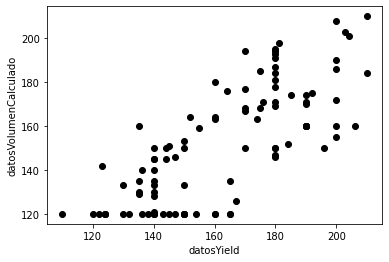

In [4]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(datos.datosAltura,datos.datosAlturaCalculada,c="black")
pyplot.xlabel("datosYield")
pyplot.ylabel("datosVolumenCalculado")

pyplot.show()

In [5]:
print(datos.datosArea[0])

1.2816602041408365


SE CALCULA LA VARIABLE COMBINADA
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [ ]:

import math
dataFinal = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueVolume=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    dataFinal.append(valueVolume)
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataFinal,datos.datosVolumenCalculado,c="black")
pyplot.xlabel("datosVolumenVariableCombinada")
pyplot.ylabel("datosVolumenCalculado")

pyplot.show()


In [ ]:

from definirCorrelacionVariables import calcularVariableCombinada
xFit=calcularVariableCombinada(datos)
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(xFit,datos.datosVolumenCalculado,c="black")
pyplot.xlabel("datosVolumenVariableCombinada")
pyplot.ylabel("datosVolumenCalculado")

pyplot.show()


In [ ]:

from definirCorrelacionVariables import calcularVariableCombinada
xFit=calcularVariableCombinada(datos)
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(xFit,datos.datosVolumenCalculado,c="black")
pyplot.xlabel("datosVolumenVariableCombinada")
pyplot.ylabel("datosVolumenCalculado")

pyplot.show()


In [11]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, xFit, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(xFit, *popt)
r2_score(datos.datosYeld, y_pred)

0.30605754767413096

In [12]:
popt, pcov = curve_fit(definirCorrelacionVariables.objective, datos.datosVolumenCalculado, datos.datosYeld)
y_pred = definirCorrelacionVariables.objective(datos.datosVolumenCalculado, *popt)
r2_score(datos.datosYeld, y_pred)

0.4184145402078504